In [13]:
%matplotlib notebook

import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.get_backend()

'nbAgg'

In [2]:
fp = lambda filename: os.path.join('./data/predict_future_sales/', filename)
test = pd.read_csv(fp('test.csv'))
item_categories = pd.read_csv(fp('item_categories.csv'))
sales_train = pd.read_csv(fp('sales_train.csv'))
items = pd.read_csv(fp('items.csv'))
shops = pd.read_csv(fp('shops.csv'))

In [3]:
# Convert date column from object to datetime
def to_yyyymmdd(date):
    """
    Converts date from format dd.mm.yyyy to yyyymmdd
    """
    date_list = date.split('.')
    return '{}-{}-{}'.format(date_list[2], date_list[1], date_list[0])

sales_train['date_yyyymmdd'] = pd.to_datetime(sales_train['date'].apply(lambda date: to_yyyymmdd(date)))
sales_train['month'] = sales_train['date_yyyymmdd'].dt.month
sales_train['weekday'] = sales_train['date_yyyymmdd'].dt.weekday_name

In [4]:
sales_train = sales_train.sort_values(by='date_yyyymmdd')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_yyyymmdd,month,weekday
49800,01.01.2013,0,18,5823,2500.0,1.0,2013-01-01,1,Tuesday
29784,01.01.2013,0,27,5573,849.0,1.0,2013-01-01,1,Tuesday
35476,01.01.2013,0,7,1006,399.0,1.0,2013-01-01,1,Tuesday
8330,01.01.2013,0,19,17707,899.0,1.0,2013-01-01,1,Tuesday
57384,01.01.2013,0,14,19548,149.0,1.0,2013-01-01,1,Tuesday


<IPython.core.display.Javascript object>


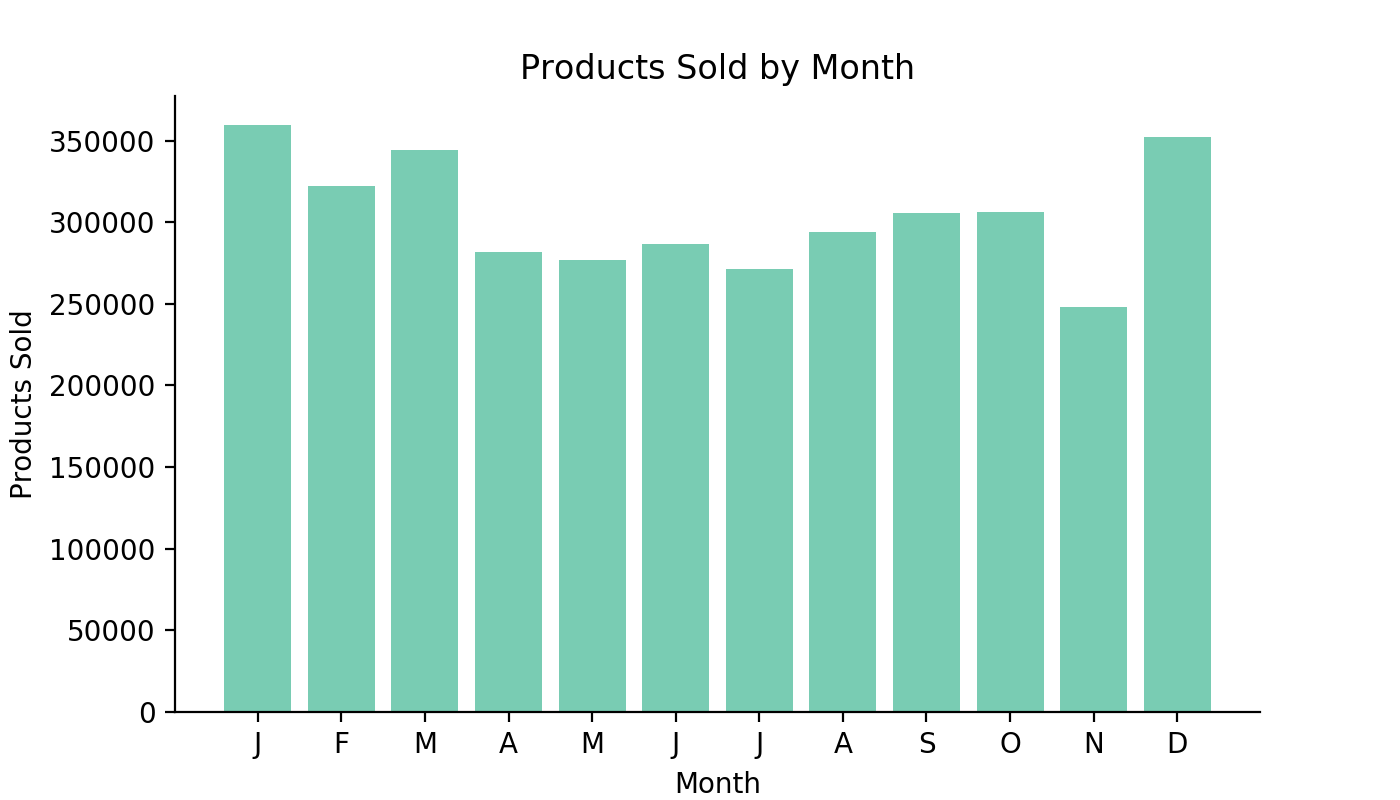

In [5]:
# Aggregate data
monthly_sales = sales_train.groupby('month').agg({'item_cnt_day': np.sum})

fig = plt.figure(figsize=(7, 4))
plt.bar(
    monthly_sales.index, 
    monthly_sales['item_cnt_day'], 
    tick_label=list('JFMAMJJASOND'), 
    color='#79ccb3'
)

plt.title('Products Sold by Month')
plt.xlabel('Month')
plt.ylabel('Products Sold')

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
fig.savefig('./output/predict_future_sales/products_sold_by_month.png')

<IPython.core.display.Javascript object>


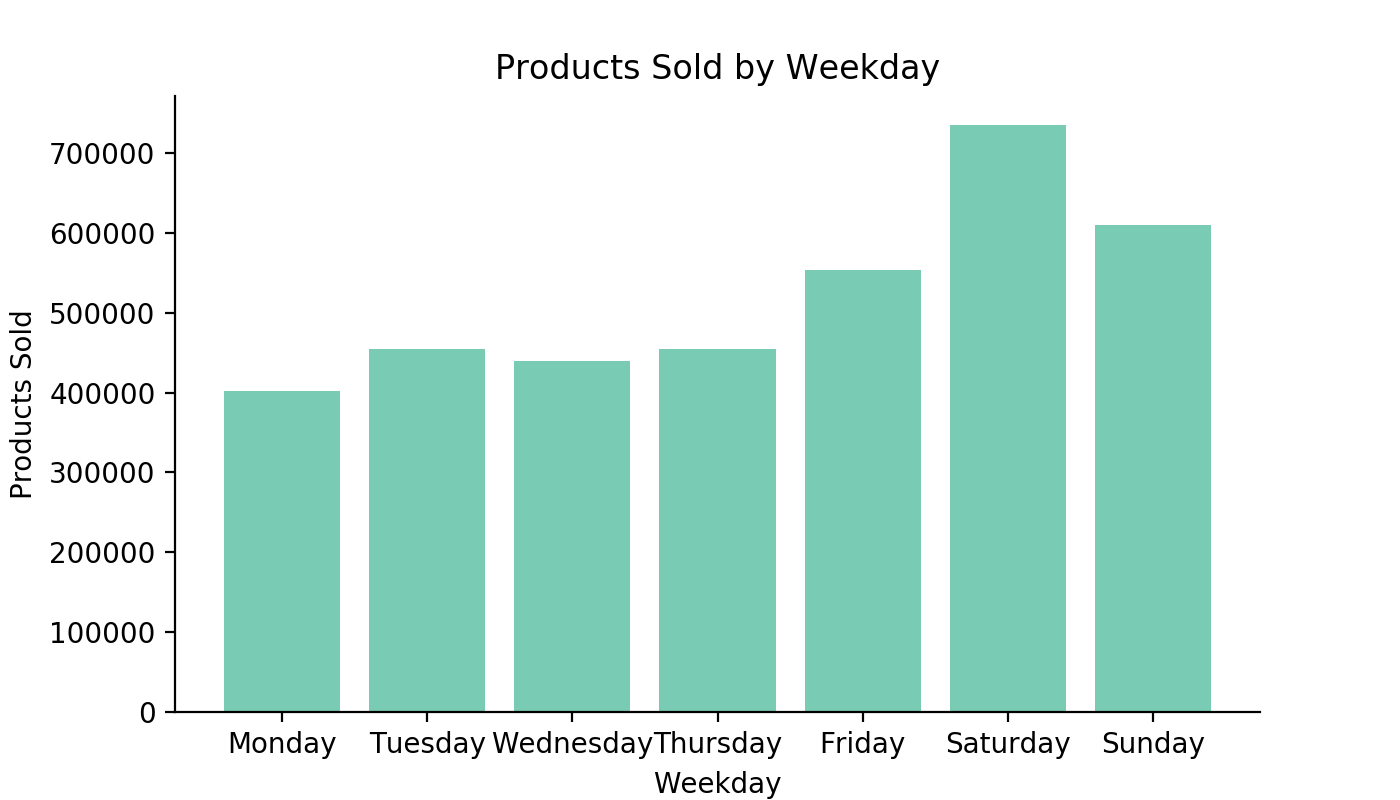

In [14]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_train['weekday'] = sales_train['weekday'].astype('category', categories=cats, ordered=True)
weekday_sales = sales_train.groupby('weekday').agg({'item_cnt_day': np.sum})

fig = plt.figure(figsize=(7, 4))
plt.bar(
    weekday_sales.index, 
    weekday_sales['item_cnt_day'], 
    color='#79ccb3'
)

plt.title('Products Sold by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Products Sold')

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
fig.savefig('./output/predict_future_sales/products_sold_by_weekday.png')